In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
plt.rcParams['font.sans-serif']=['SimHei']  
plt.rcParams['axes.unicode_minus']=False  
plt.style.use('ggplot')

In [ ]:
df = pd.read_table('australian.dat',sep=' ', header=None)
df.columns = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'Default']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


分类变量处理：哑变量

In [ ]:
categorical_columns = ['A1', 'A4', 'A5', 'A6', 'A8', 'A9', 'A11', 'A12']
df = pd.get_dummies(df, columns = categorical_columns)

In [ ]:
df.describe()

,A2,A3,A7,A10,A13,A14,Default,A1_0,A1_1,A4_1,...,A6_9,A8_0,A8_1,A9_0,A9_1,A11_0,A11_1,A12_1,A12_2,A12_3
count,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,...,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,31.568203,4.758725,2.223406,2.40000,184.014493,1018.385507,0.444928,0.321739,0.678261,0.236232,...,0.011594,0.476812,0.523188,0.572464,0.427536,0.542029,0.457971,0.082609,0.905797,0.011594
std,11.853273,4.978163,3.346513,4.86294,172.159274,5210.102598,0.497318,0.467482,0.467482,0.425074,...,0.107128,0.499824,0.499824,0.495080,0.495080,0.498592,0.498592,0.275490,0.292323,0.107128
min,13.750000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.670000,1.000000,0.165000,0.00000,80.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,28.625000,2.750000,1.000000,0.00000,160.000000,6.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,37.707500,7.207500,2.625000,3.00000,272.000000,396.500000,1.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100001.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


连续变量处理：标准化.   
先划分训练集和测试集，在求训练集的连续变量每一列的方差和均值，用得到的训练集的方差和均值分别对训练集和测试集做标准化

In [ ]:
train_df, test_df = train_test_split(df, test_size = 0.3, random_state= 2019)
train_y = train_df.Default
test_y = test_df.Default
train_x = train_df.drop(['Default'], axis = 1)
test_x = test_df.drop(['Default'], axis = 1)

In [ ]:
continus_keys = train_x.keys()[:6]
continus_keys

Index(['A2', 'A3', 'A7', 'A10', 'A13', 'A14'], dtype='object')

In [ ]:
for each in continus_keys:
    std,mean = [np.std(train_x[each]),np.mean(train_x[each])]
    f = lambda x: (x-mean)/(std)
    train_x[each] = train_x[each].apply(f)
    test_x[each] = test_x[each].apply(f)

In [ ]:
test_x.shape,train_x.shape

((207, 42), (483, 42))

训练集和测试集的维度

In [ ]:
# test_x.describe()

In [ ]:
def print_roc_curve(test_y, predictions):
    false_positive_rate, recall, thresholds = roc_curve(test_y, predictions)
    roc_auc = auc(false_positive_rate, recall)
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.ylabel('Recall')
    plt.xlabel('Fall-out (1-Specificity)')
    plt.show()

In [ ]:
def print_confusion_matrix(test_y, predictions):
    cm = confusion_matrix(test_y, predictions)
    labels = ['No Default', 'Default']
    plt.figure(figsize=(8,6))
    sns.heatmap(cm,xticklabels=labels, yticklabels=labels, annot=True, fmt='d', cmap="Blues", vmin = 0.2);
    plt.title('Confusion Matrix')
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    plt.show()
    target_names = ['class 0', 'class 1']
    print(classification_report(test_y, predictions, target_names=target_names))
    recall = metrics.recall_score(test_y, predictions)
    f1 = metrics.f1_score(test_y, predictions)
    acc = metrics.accuracy_score(test_y, predictions)
    pre = metrics.precision_score(test_y, predictions)
    auc = metrics.roc_auc_score(test_y,predictions)
    return [recall,pre,acc,f1,auc]

In [ ]:
RESULT = {}

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

GridSearchCV 为网格搜索， 在训练集上进行10折交叉验证，目的找到最优参数
搜索参数：  
k_range：领域大小  
p: 距离定义,p=2:欧式距离;p=1：曼哈顿距离  
这里距离定义都是用于连续变量，但是数据集中还有分类变量，存在一点不合理，ppt还是别展示，避免被问到

In [ ]:
knn = KNeighborsClassifier()
k_range = list(range(5,15))
p = [1,2]
param_gridknn = dict(n_neighbors = k_range,p=p)
gridKNN = GridSearchCV(knn, param_gridknn, cv=10, scoring='roc_auc',verbose=1, n_jobs=-1)
gridKNN.fit(train_x,train_y)
print('best params are:',str(gridKNN.best_params_))

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    7.4s


best params are: {'n_neighbors': 10, 'p': 1}


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    8.6s finished


Overall accuracy of KNN model: 0.8647342995169082


/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


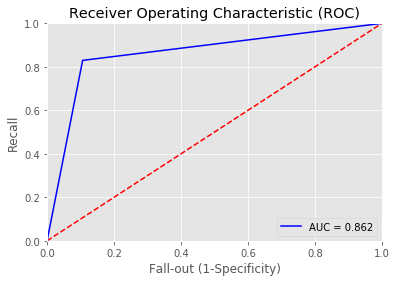

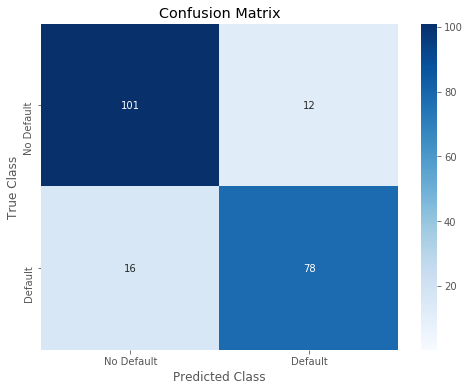

              precision    recall  f1-score   support

     class 0       0.86      0.89      0.88       113
     class 1       0.87      0.83      0.85        94

   micro avg       0.86      0.86      0.86       207
   macro avg       0.86      0.86      0.86       207
weighted avg       0.86      0.86      0.86       207



In [ ]:
knn = KNeighborsClassifier(n_neighbors=10, p=1)
knn.fit(train_x, train_y)

predictions_Knn_prob = knn.predict(test_x)
predictions_Knn_01 = np.where(predictions_Knn_prob > 0.5, 1, 0) 

acc_knn = accuracy_score(test_y, predictions_Knn_01)
print('Overall accuracy of KNN model:', acc_knn)

print_roc_curve(test_y, predictions_Knn_prob)
r = print_confusion_matrix(test_y, predictions_Knn_01)
RESULT['KNN'] = r

# LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

Overall accuracy of LDA model: 0.8357487922705314


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


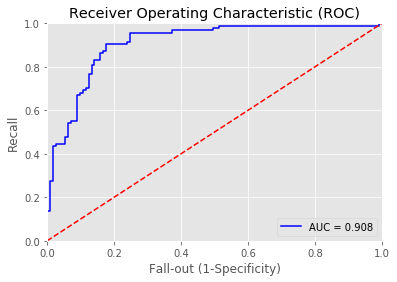

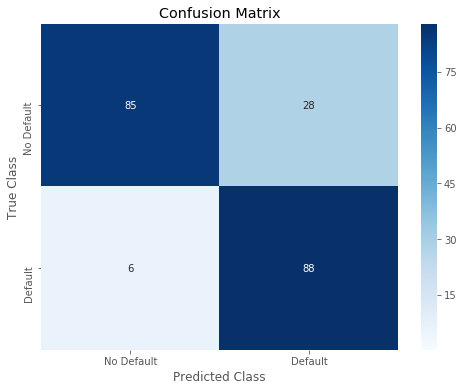

              precision    recall  f1-score   support

     class 0       0.93      0.75      0.83       113
     class 1       0.76      0.94      0.84        94

   micro avg       0.84      0.84      0.84       207
   macro avg       0.85      0.84      0.84       207
weighted avg       0.85      0.84      0.84       207



In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(train_x, train_y)

predictions_LDA_01 = lda.predict(test_x)
predictions_LDA_prob = lda.predict_proba(test_x)
predictions_LDA_prob = predictions_LDA_prob[:,1]

acc_lda = accuracy_score(test_y, predictions_LDA_01)
print('Overall accuracy of LDA model:', acc_lda)

print_roc_curve(test_y, predictions_LDA_prob)
r = print_confusion_matrix(test_y, predictions_LDA_01)
RESULT['LDA'] = r

# NB

In [ ]:
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB

GaussianNB就是先验为高斯分布的朴素贝叶斯，  
MultinomialNB就是先验为多项式分布的朴素贝叶斯，  
而BernoulliNB就是先验为伯努利分布的朴素贝叶斯。  
贝叶斯方法数据使用未经标准化的数据，保持原有数据的分布

In [ ]:
train_df1, test_df1 = train_test_split(df, test_size = 0.3, random_state= 2019)
train_y1 = train_df1.Default
test_y1 = test_df1.Default
train_x1 = train_df1.drop(['Default'], axis = 1)
test_x1 = test_df1.drop(['Default'], axis = 1)

In [ ]:
classifiers = {
    'BNB': BernoulliNB(),
    'GNB': GaussianNB(),
    'MNB': MultinomialNB()}

In [ ]:
for name, clf in classifiers.items():
    scores = cross_val_score(clf, train_x1, train_y1, cv=10, scoring='roc_auc')
    print(name,'\t--> ',scores.mean())

BNB 	-->  0.9022927689594358
GNB 	-->  0.9014189514189515
MNB 	-->  0.6811768478435146


可见BernoulliNB在NB大类中相对较优

Overall accuracy of Naive Bayes model: 0.8357487922705314


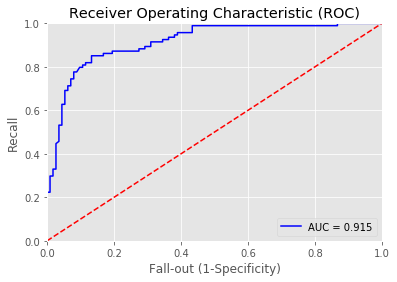

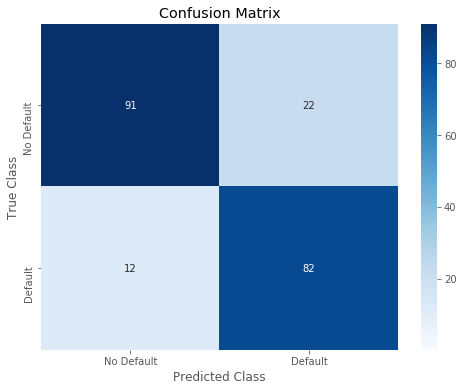

              precision    recall  f1-score   support

     class 0       0.88      0.81      0.84       113
     class 1       0.79      0.87      0.83        94

   micro avg       0.84      0.84      0.84       207
   macro avg       0.84      0.84      0.84       207
weighted avg       0.84      0.84      0.84       207



In [ ]:
clf = BernoulliNB() 
clf.fit(train_x1, train_y1)

#Predict on test set
predictions_Naive_Bayes_prob = clf.predict_proba(test_x1)
predictions_Naive_Bayes_prob = predictions_Naive_Bayes_prob[:,1]
predictions_Naive_Bayes_01 = clf.predict(test_x1)

#Print accuracy
acc_Naive = accuracy_score(test_y, predictions_Naive_Bayes_01)
print('Overall accuracy of Naive Bayes model:', acc_Naive)

print_roc_curve(test_y1, predictions_Naive_Bayes_prob)
r = print_confusion_matrix(test_y, predictions_Naive_Bayes_01)
RESULT['MNB'] = r

# LR

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

先不做特征处理，不做标准化，直接进行拟合 

参数选择：  
正则化：l1,l2  
正则化参数：C  
样本权重：平衡权重，均匀权重

In [ ]:
lr = LogisticRegression()
penalty  = ['l1','l2']
C = [1,0.3,0.1,0.03,0.01]
class_weight = ['balanced',None]
param_gridknn = dict(penalty=penalty,C=C,class_weight=class_weight)
gridLR = GridSearchCV(lr, param_gridknn, cv=10, scoring='roc_auc',verbose=1, n_jobs=-1)
gridLR.fit(train_x1,train_y1)
print('best params are:',str(gridLR.best_params_))

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    5.0s


best params are: {'C': 1, 'class_weight': None, 'penalty': 'l1'}


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    5.3s finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Overall accuracy of Logistic Regression model: 0.8647342995169082


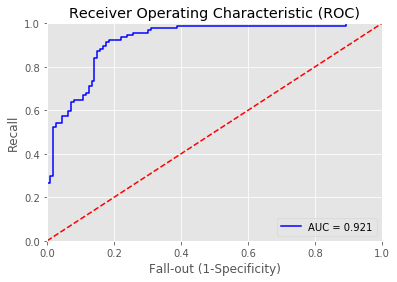

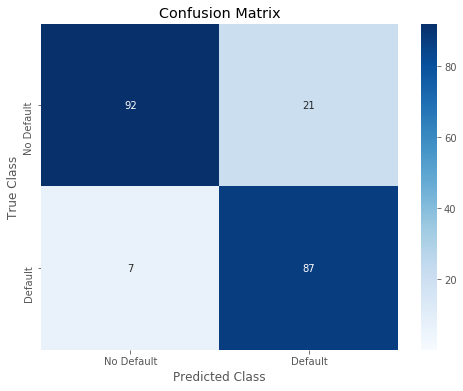

              precision    recall  f1-score   support

     class 0       0.93      0.81      0.87       113
     class 1       0.81      0.93      0.86        94

   micro avg       0.86      0.86      0.86       207
   macro avg       0.87      0.87      0.86       207
weighted avg       0.87      0.86      0.86       207



In [ ]:
logreg = LogisticRegression(class_weight=None,C=1,penalty='l1')
logreg.fit(train_x1, train_y1)

predictions_LogReg_prob = logreg.predict_proba(test_x1)
predictions_LogReg_prob = predictions_LogReg_prob[:,1]
predictions_LogReg_01 = logreg.predict(test_x1)

acc_logit = accuracy_score(test_y1, predictions_LogReg_01)
print('Overall accuracy of Logistic Regression model:', acc_logit)

print_roc_curve(test_y1, predictions_LogReg_prob)
r = print_confusion_matrix(test_y1, predictions_LogReg_01)
RESULT['lr'] = r

对'A3', 'A7', 'A10', 'A13', 'A14'连续变量离散化后(全部等宽离散化为4组)，进行拟合  
之所以选择'A3', 'A7', 'A10', 'A13', 'A14'使因为这些列的数据分布很不均匀，而A2较均匀。

In [ ]:
df = pd.read_table('australian.dat',sep=' ', header=None)
df.columns = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'Default']
df1 = df
for each in ['A3', 'A7', 'A10', 'A13', 'A14']:
    df1[each] = pd.cut(df1[each],bins=4,labels=['a','b','c','d'])
df1 = pd.get_dummies(df1)
train_df1, test_df1 = train_test_split(df1, test_size = 0.3, random_state= 2019)
train_y1 = train_df1.Default
test_y1 = test_df1.Default
train_x1 = train_df1.drop(['Default'], axis = 1)
test_x1 = test_df1.drop(['Default'], axis = 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


In [ ]:
lr = LogisticRegression()
penalty  = ['l1','l2']
C = [1,0.3,0.1,0.03,0.01]
class_weight = ['balanced',None]
param_gridknn = dict(penalty=penalty,C=C,class_weight=class_weight)
gridLR = GridSearchCV(lr, param_gridknn, cv=10, scoring='roc_auc',verbose=1, n_jobs=-1)
gridLR.fit(train_x1,train_y1)
print('best params are:',str(gridLR.best_params_))

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    6.7s finished


best params are: {'C': 1, 'class_weight': None, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Overall accuracy of Logistic Regression model: 0.855072463768116


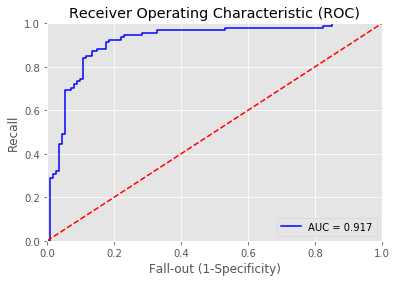

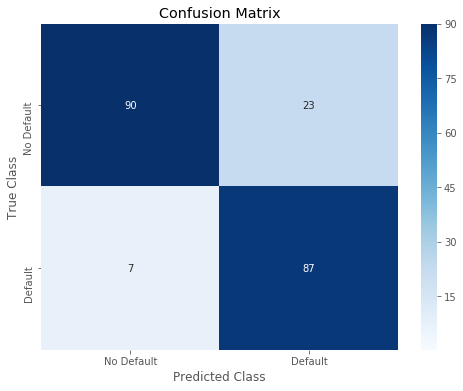

              precision    recall  f1-score   support

     class 0       0.93      0.80      0.86       113
     class 1       0.79      0.93      0.85        94

   micro avg       0.86      0.86      0.86       207
   macro avg       0.86      0.86      0.86       207
weighted avg       0.87      0.86      0.86       207



In [ ]:
logreg = LogisticRegression(class_weight=None,C=1,penalty='l1')
logreg.fit(train_x1, train_y1)

predictions_LogReg_prob = logreg.predict_proba(test_x1)
predictions_LogReg_prob = predictions_LogReg_prob[:,1]
predictions_LogReg_01 = logreg.predict(test_x1)

acc_logit = accuracy_score(test_y1, predictions_LogReg_01)
print('Overall accuracy of Logistic Regression model:', acc_logit)

print_roc_curve(test_y1, predictions_LogReg_prob)
r = print_confusion_matrix(test_y1, predictions_LogReg_01)
RESULT['lr1'] = r

特征离散化和不离散化结果几乎一致，没有特别的差距，应该是数据集的特点

# Decision Tree ：Cart

In [ ]:
from sklearn.tree import DecisionTreeClassifier

参数选择：  
树深：max_depth  

In [ ]:
dt = DecisionTreeClassifier()
max_depth = [2, 4, 8, 16, None]
param_griddt = dict(max_depth = max_depth)
gridKNN = GridSearchCV(dt, param_griddt, cv=10, scoring='roc_auc',verbose=1, n_jobs=-1)
gridKNN.fit(train_x,train_y)
print('best params are:',str(gridKNN.best_params_))

Fitting 10 folds for each of 5 candidates, totalling 50 fits
best params are: {'max_depth': 2}


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    5.7s finished


Overall accuracy of Decision Tree model: 0.8405797101449275


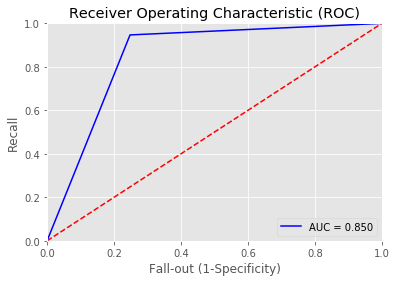

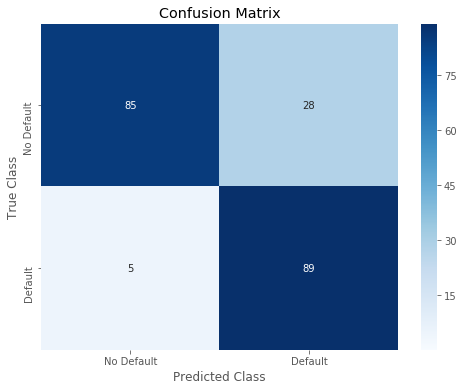

              precision    recall  f1-score   support

     class 0       0.94      0.75      0.84       113
     class 1       0.76      0.95      0.84        94

   micro avg       0.84      0.84      0.84       207
   macro avg       0.85      0.85      0.84       207
weighted avg       0.86      0.84      0.84       207



In [ ]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(train_x, train_y)

predictions_dt_prob = dt.predict(test_x)
predictions_dt_01 = np.where(predictions_dt_prob > 0.5, 1, 0) 

acc_dt = accuracy_score(test_y, predictions_dt_01)
print('Overall accuracy of Decision Tree model:', acc_dt)

print_roc_curve(test_y, predictions_dt_prob)
r = print_confusion_matrix(test_y, predictions_dt_01)
RESULT['DT'] = r

# SVM

In [ ]:
from sklearn.svm import SVC

参数选择：  
核函数：多项式，sigmoid，高斯核函数，线性核函数，线性核函数    
gamma:核函数系数  
C：正则项系数 

In [ ]:
svm = SVC()
param_gridsvm = [{'kernel': ['poly', 'rbf', 'sigmoid'], 'gamma': [0.001,0.003,0.01,0.03,0.1,1],
                     'C': [0.01,0.03,0.1,1, 3,10,30, 100,300, 1000]},
                    {'kernel': ['linear'], 'C': [0.01,0.03,0.1,1, 3,10,30, 100,300, 1000]}]
gridsvm = GridSearchCV(svm, param_gridsvm, cv=10, scoring='roc_auc',verbose=1, n_jobs=-1)
gridsvm.fit(train_x,train_y)
print('best params are:',str(gridsvm.best_params_))

Fitting 10 folds for each of 190 candidates, totalling 1900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 1156 tasks      | elapsed:   25.0s


best params are: {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}


[Parallel(n_jobs=-1)]: Done 1900 out of 1900 | elapsed:  1.9min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Overall accuracy of SVM model: 0.8647342995169082


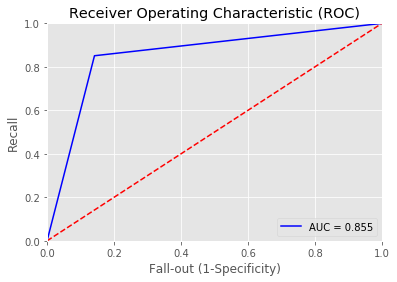

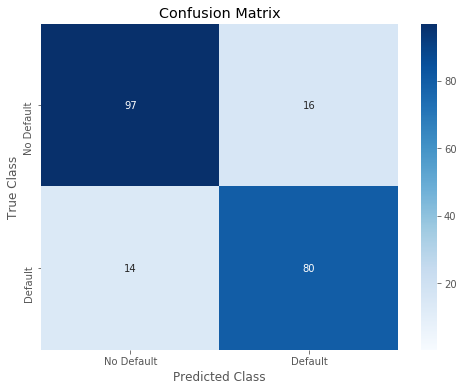

              precision    recall  f1-score   support

     class 0       0.87      0.86      0.87       113
     class 1       0.83      0.85      0.84        94

   micro avg       0.86      0.86      0.86       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.86      0.86      0.86       207



In [ ]:
svm = SVC(C=0.1, gamma=0.1, kernel='poly')
svm.fit(train_x, train_y)

predictions_svm_prob = svm.predict(test_x)
predictions_svm_01 = np.where(predictions_svm_prob > 0.5, 1, 0) 

acc_svm = accuracy_score(test_y, predictions_svm_01)
print('Overall accuracy of SVM model:', acc_knn)

print_roc_curve(test_y, predictions_svm_prob)
r = print_confusion_matrix(test_y, predictions_svm_01)
RESULT['SVM'] = r

# RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier

参数选择：  
n_estimaors: 森林中树的个数  
max_depth: 最大树深  

In [ ]:
rf = RandomForestClassifier()
n_estimators = list(range(5,101,10))
max_depth = list(range(2,20,2))
param_gridrf = dict(n_estimators = n_estimators, max_depth=max_depth)
gridRF = GridSearchCV(rf, param_gridrf, cv=10, scoring='roc_auc',verbose=1, n_jobs=-1)
gridRF.fit(train_x,train_y)
print('best params are:',str(gridRF.best_params_))

Fitting 10 folds for each of 90 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 348 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done 848 tasks      | elapsed:   37.3s


best params are: {'max_depth': 10, 'n_estimators': 95}


[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:   40.0s finished


Overall accuracy of Random Forest model: 0.855072463768116


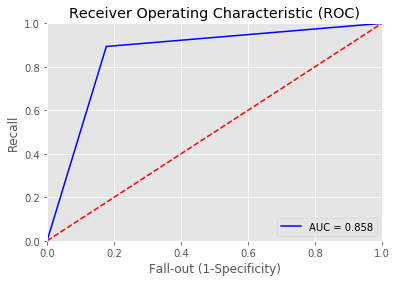

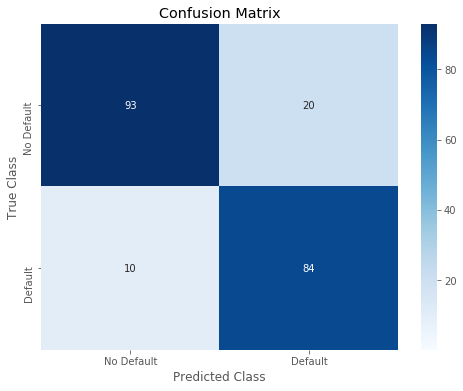

              precision    recall  f1-score   support

     class 0       0.90      0.82      0.86       113
     class 1       0.81      0.89      0.85        94

   micro avg       0.86      0.86      0.86       207
   macro avg       0.86      0.86      0.85       207
weighted avg       0.86      0.86      0.86       207



In [ ]:
rf = RandomForestClassifier(n_estimators=95, max_depth=10)
rf.fit(train_x, train_y)

predictions_rf_prob = rf.predict(test_x)
predictions_rf_01 = np.where(predictions_rf_prob > 0.5, 1, 0) 

acc_rf = accuracy_score(test_y, predictions_rf_01)
print('Overall accuracy of Random Forest model:', acc_rf)

print_roc_curve(test_y, predictions_rf_prob)
r = print_confusion_matrix(test_y, predictions_rf_01)
RESULT['RF'] = r

# XGBoost

In [ ]:
import xgboost as xgb 

参数选择：  
学习率  
弱学习器的个数  
最大树深  
样本采样比列   
叶子权重正则系数  
叶子个数正则系数

In [ ]:
XGB = xgb.XGBClassifier()
param_gridxgb = dict(
    learning_rate = [1,0.1,0.01], 
    n_estimators = [8,16,32,64],
    max_depth = [2,4,6,8,10],
    subsample = [1,0.8,0.6],
    reg_alpha = [1,0.1,0],
    reg_lambda = [1,0.1,0]
)
gridxgb = GridSearchCV(XGB, param_gridxgb, cv=5, scoring='roc_auc',verbose=1, n_jobs=-1)
gridxgb.fit(train_x,train_y)
print('best params are:',str(gridxgb.best_params_))

Fitting 5 folds for each of 1620 candidates, totalling 8100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 281 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 1481 tasks      | elapsed:   37.6s
[Parallel(n_jobs=-1)]: Done 3481 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 5277 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 7077 tasks      | elapsed:  3.8min


best params are: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 32, 'reg_alpha': 0, 'reg_lambda': 0.1, 'subsample': 0.6}


[Parallel(n_jobs=-1)]: Done 8100 out of 8100 | elapsed:  4.5min finished


In [ ]:
gridxgb.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'n_estimators': 32,
 'reg_alpha': 0,
 'reg_lambda': 0.1,
 'subsample': 0.6}

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


1


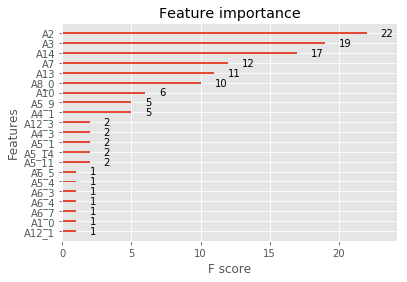

In [ ]:
% matplotlib inline
xgdmat = xgb.DMatrix(train_x, train_y) # Create our DMatrix to make XGBoost more efficient
testdmat = xgb.DMatrix(test_x)
# final_gb = xgb.train(gridxgb.best_params_, xgdmat)

# predictions_xgb_prob = final_gb.predict(testdmat)
# predictions_xgb_01 = np.where(predictions_xgb_prob > 0.5, 1, 0) #Turn probability to 0-1 binary output

# xgb.plot_importance(final_gb)

trainxdmat = xgb.DMatrix(train_x) # Create our DMatrix to make XGBoost more efficient
trainydmat = xgb.DMatrix(train_y) # Create our DMatrix to make XGBoost more efficient
XGB = xgb.XGBClassifier(learning_rate=0.1,
                        max_depth=4,
                        n_estimators= 32,
                        reg_alpha= 0,
                        reg_lambda= 0.1,
                        subsample= 0.6,                    
                       )
XGB.fit(train_x.values,train_y.values)
print('1')

predictions_xgb_prob = XGB.predict(test_x.values)
predictions_xgb_01 = np.where(predictions_xgb_prob > 0.5, 1, 0) #Turn probability to 0-1 binary output

Overall accuracy of Light GBM model: 0.8647342995169082


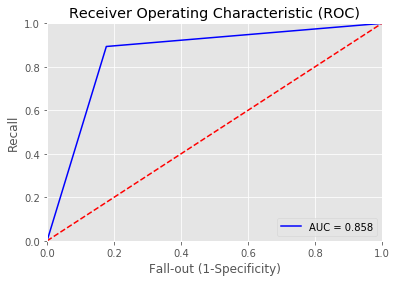

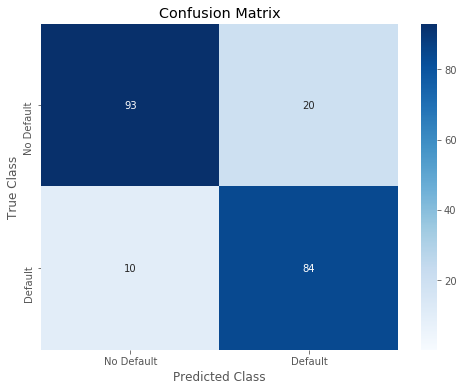

              precision    recall  f1-score   support

     class 0       0.90      0.82      0.86       113
     class 1       0.81      0.89      0.85        94

   micro avg       0.86      0.86      0.86       207
   macro avg       0.86      0.86      0.85       207
weighted avg       0.86      0.86      0.86       207



In [ ]:
acc_lgbm = accuracy_score(test_y,predictions_xgb_01)
print('Overall accuracy of Light GBM model:', acc_lgbm)

print_roc_curve(test_y, predictions_rf_prob)
r = print_confusion_matrix(test_y, predictions_rf_01)
RESULT['XGB'] = r

# LightGBM（GBDT）

先单纯使用GBDT

In [ ]:
import lightgbm as lgb 

In [ ]:
train_data=lgb.Dataset(train_x,label=train_y)

params = {'boosting_type': 'gbdt',
          'max_depth' : -1,
          'objective': 'binary',
          'nthread': 5, # Updated from nthread
          'num_leaves': 64,
          'learning_rate': 0.05,
          'max_bin': 512,
          'subsample_for_bin': 200,
          'subsample': 1,
          'subsample_freq': 1,
          'colsample_bytree': 0.8,
          'reg_alpha': 5,
          'reg_lambda': 10,
          'min_split_gain': 0.5,
          'min_child_weight': 1,
          'min_child_samples': 5,
          'scale_pos_weight': 1,
          'num_class' : 1,
          'metric' : 'binary_error'
          }

gridParams = {
    'learning_rate': [1,0.1,0.01],
    'n_estimators': [8,16,32,64],
    'num_leaves': [50,100,150,200,250,300],
    'boosting_type' : ['gbdt'],
    'objective' : ['binary'], 
    'colsample_bytree' : [1,0.8,0.6],
    'subsample' : [1,0.8,0.6],
    'reg_alpha' : [10,3,1, 0.1],
    'reg_lambda' : [10,3,1, 0.1],
    }

mdl = lgb.LGBMClassifier(boosting_type= 'gbdt',
          objective = 'binary',
          n_jobs = 5, # Updated from 'nthread'
          silent = True,
          max_depth = params['max_depth'],
          max_bin = params['max_bin'],
          subsample_for_bin = params['subsample_for_bin'],
          subsample = params['subsample'],
          subsample_freq = params['subsample_freq'],
          min_split_gain = params['min_split_gain'],
          min_child_weight = params['min_child_weight'],
          min_child_samples = params['min_child_samples'],
          scale_pos_weight = params['scale_pos_weight'])

mdl.get_params().keys()

dict_keys(['boosting_type', 'class_weight', 'colsample_bytree', 'importance_type', 'learning_rate', 'max_depth', 'min_child_samples', 'min_child_weight', 'min_split_gain', 'n_estimators', 'n_jobs', 'num_leaves', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'silent', 'subsample', 'subsample_for_bin', 'subsample_freq', 'max_bin', 'scale_pos_weight'])

这里用的4折交叉验证，因为参数实在太多，跑不动，太慢了，其实用10折比较好  
后来把正则项系数改大了，因为后面发现过拟合了，但是还没跑，就用原来的参数吧；或者你有时间就直接运行一下就可以

In [ ]:
grid = GridSearchCV(mdl, gridParams, verbose=1, cv=4, n_jobs=-1)
grid.fit(train_x, train_y)

print(grid.best_params_)
print(grid.best_score_)


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


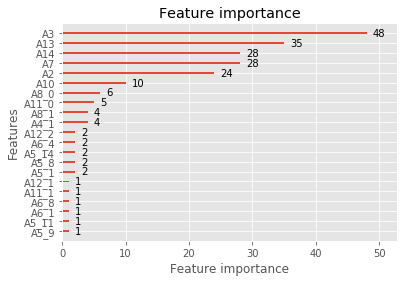

In [ ]:
% matplotlib inline
best_p = {'boosting_type': 'gbdt', 'colsample_bytree': 0.6, 'learning_rate': 1, 'n_estimators': 16, 'num_leaves': 50, 'objective': 'binary', 'reg_alpha': 0.01, 'reg_lambda': 1, 'subsample': 1}
lgbm = lgb.train(best_p,#grid.best_params_,
                 train_data,
                 2500,
                 verbose_eval= 4
                 )

predictions_lgbm_prob = lgbm.predict(test_x)
predictions_lgbm_01 = np.where(predictions_lgbm_prob > 0.5, 1, 0) 

lgb.plot_importance(lgbm, max_num_features=21, importance_type='split')


Overall accuracy of Light GBM model: 0.8695652173913043


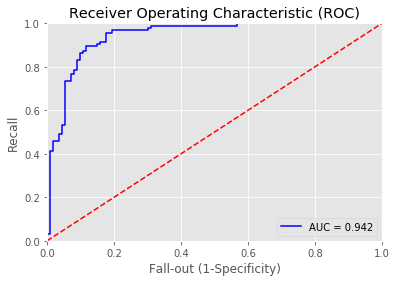

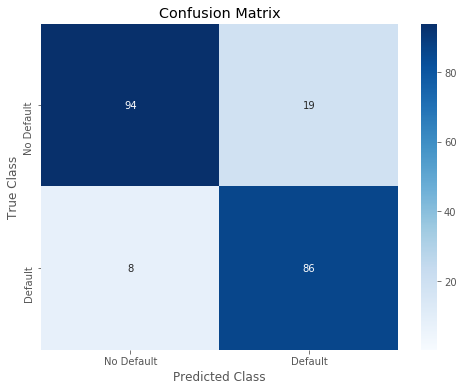

              precision    recall  f1-score   support

     class 0       0.92      0.83      0.87       113
     class 1       0.82      0.91      0.86        94

   micro avg       0.87      0.87      0.87       207
   macro avg       0.87      0.87      0.87       207
weighted avg       0.88      0.87      0.87       207



In [ ]:
acc_lgbm = accuracy_score(test_y,predictions_lgbm_01)
print('Overall accuracy of Light GBM model:', acc_lgbm)
print_roc_curve(test_y, predictions_lgbm_prob)
r = print_confusion_matrix(test_y, predictions_lgbm_01)
RESULT['GBDT'] = r

# GBDT　＋ LR

1.通过GBDT进行特征转换(为了发现有效的特征和特征组合): 判断样本落在哪个叶子节点上,每个叶子节点作为lr的一维特征,通过遍历树，就得到了该样本对应的所有LR特征。构造的新特征向量是取值onehot化的  
2.转换得到新的特征后，用lr分类  

继续使用上面GBDT模型，得到新的特征

In [ ]:
y_pred = lgbm.predict(train_x, pred_leaf=True)

# y_pred = final_gb.predict(testdmat,pred_leaf=True)

y_pred.shape
num_leaf = max([max(each) for each in y_pred])
num_leaf

17

In [ ]:
print('Writing transformed training data')
# num_leaf = grid.best_params_['num_leaves']
transformed_training_matrix = np.zeros([len(y_pred), len(y_pred[0]) * num_leaf],
                                       dtype=np.int64)  # N * num_tress * num_leafs
for i in range(0, len(y_pred)):
    temp = np.arange(len(y_pred[0])) * num_leaf + np.array(y_pred[i])
    transformed_training_matrix[i][temp] += 1

Writing transformed training data


In [ ]:
y_pred = lgbm.predict(test_x, pred_leaf=True)
print('Writing transformed testing data')
transformed_testing_matrix = np.zeros([len(y_pred), len(y_pred[0]) * num_leaf], dtype=np.int64)
for i in range(0, len(y_pred)):
    temp = np.arange(len(y_pred[0])) * num_leaf + np.array(y_pred[i])
    transformed_testing_matrix[i][temp] += 1

Writing transformed testing data


In [ ]:
transformed_testing_matrix.shape,transformed_training_matrix.shape

((207, 272), (483, 272))

训练集和测试集新的特征的维度

将GBDT换成XGoost，通过XGboost进行特征转换

In [ ]:
y_pred = XGB.apply(train_x.values)
num_leaf = max([max(each) for each in y_pred])
y_pred[13]

array([23, 25, 23, 17, 21, 24, 25, 22, 25,  6, 21, 22, 21, 19, 14, 12, 23,
       12, 12, 22,  7, 14, 22, 11, 13, 14, 19, 11, 16, 12, 21, 16],
      dtype=int32)

In [ ]:


print('Writing transformed training data')
# num_leaf = grid.best_params_['num_leaves']
transformed_training_matrix = np.zeros([len(y_pred), len(y_pred[0]) * num_leaf],
                                       dtype=np.int64)  # N * num_tress * num_leafs
for i in range(0, len(y_pred)):
    temp = np.arange(len(y_pred[0])) * num_leaf + np.array(y_pred[i])
    transformed_training_matrix[i][temp] += 1
    
y_pred = XGB.apply(test_x.values)
print('Writing transformed testing data')
transformed_testing_matrix = np.zeros([len(y_pred), len(y_pred[0]) * num_leaf], dtype=np.int64)
for i in range(0, len(y_pred)):
    temp = np.arange(len(y_pred[0])) * num_leaf + np.array(y_pred[i])
    transformed_testing_matrix[i][temp] += 1

transformed_testing_matrix.shape,transformed_training_matrix.shape

Writing transformed training data
Writing transformed testing data


((207, 832), (483, 832))

用新的特征进行lr分类,先做参数选择

In [ ]:
lr = LogisticRegression()
penalty  = ['l1','l2']
C = [10,3,1,0.3,0.1,0.03,0.01]
class_weight = ['balanced',None]
param_gridknn = dict(penalty=penalty,C=C,class_weight=class_weight)
gridLR = GridSearchCV(lr, param_gridknn, cv=10, scoring='roc_auc',verbose=1, n_jobs=-1)
gridLR.fit(transformed_training_matrix,train_y)
print('best params are:',str(gridLR.best_params_))

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


best params are: {'C': 0.3, 'class_weight': 'balanced', 'penalty': 'l2'}


[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:    5.3s finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Overall accuracy of Logistic Regression model: 0.8599033816425121


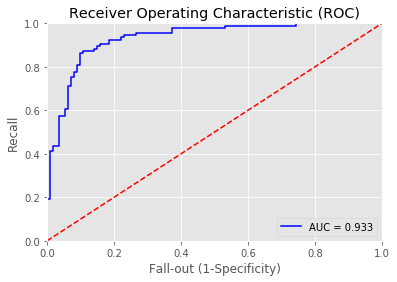

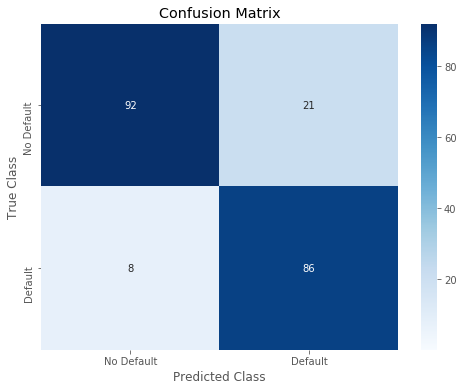

              precision    recall  f1-score   support

     class 0       0.92      0.81      0.86       113
     class 1       0.80      0.91      0.86        94

   micro avg       0.86      0.86      0.86       207
   macro avg       0.86      0.86      0.86       207
weighted avg       0.87      0.86      0.86       207



In [ ]:
logreg = LogisticRegression(class_weight='balanced',C=0.3,penalty='l2')
logreg.fit(transformed_training_matrix,train_y)

predictions_LogReg_prob = logreg.predict_proba(transformed_testing_matrix)
predictions_LogReg_prob = predictions_LogReg_prob[:,1]
predictions_LogReg_01 = logreg.predict(transformed_testing_matrix)

acc_logit = accuracy_score(test_y, predictions_LogReg_01)
print('Overall accuracy of Logistic Regression model:', acc_logit)

print_roc_curve(test_y, predictions_LogReg_prob)
r = print_confusion_matrix(test_y, predictions_LogReg_01)
RESULT['XGB_lr'] = r

# 结果汇总

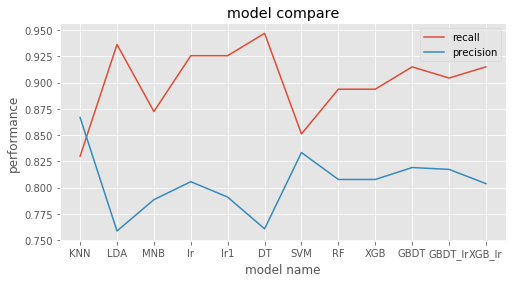

In [ ]:
model_name = RESULT.keys()
model_preformance = RESULT.values()
preformance1 = ['recall','precision']
preformance2 = ['acc','f1','auc']
xx = list(range(len(model_name)))
plt.rcParams['figure.figsize'] = (8.0, 4.0)
for i,each in enumerate(preformance1):
    plt.plot(xx,[each[i] for each in model_preformance])
    plt.title('model compare')
    plt.xlabel('model name')
    plt.ylabel('performance')
    plt.xticks(xx,model_name)
plt.legend(preformance1)

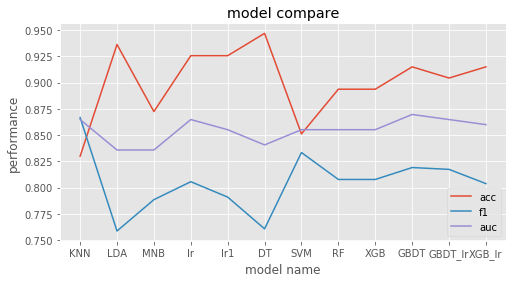

In [ ]:
for i,each in enumerate(preformance2):
    plt.plot(xx,[each[i] for each in model_preformance])
    plt.title('model compare')
    plt.xlabel('model name')
    plt.ylabel('performance')
    plt.xticks(xx,model_name)
plt.legend(preformance2)

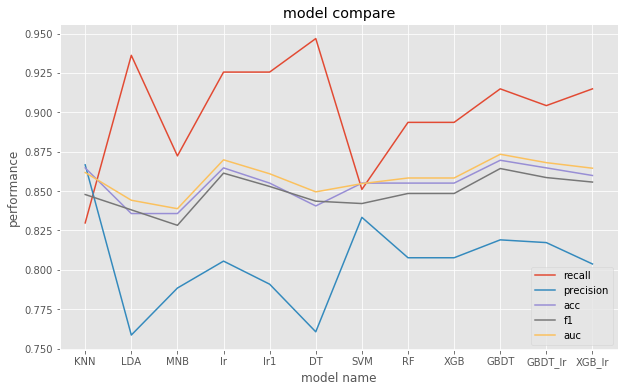

In [ ]:
model_name = RESULT.keys()
model_preformance = RESULT.values()
preformance1 = ['recall','precision']
preformance2 = ['acc','f1','auc']
preformance = preformance1 + preformance2
xx = list(range(len(model_name)))
plt.rcParams['figure.figsize'] = (10.0, 6.0)
for i,each in enumerate(preformance):
    plt.plot(xx,[each[i] for each in model_preformance])
    plt.title('model compare')
    plt.xlabel('model name')
    plt.ylabel('performance')
    plt.xticks(xx,model_name)
plt.legend(preformance)

可以着重展示一下SVM,LR,GBDT,GBDT+LR,XGBoost+LR  ,因为参数比较多,调参过程选择多一些  
后面三个模型逻辑是这样的 :   
LR 首先连续变量不做离散化直接拟合,之后选择一些连续变量做离散化再做拟合,发现模型表现没有提升,  
于是想试试更多特征的表现,  
于是通过GBDT（以每个叶子节点作为一个特征）进行特征转换，组合得到更多的特征，进行lr分类.
最后将GBDT换成ＸＧｂｏｏｓｔ做尝试

再使用GBDT或XGboost特征后，lr相比之前有了较大的改善  


但是相比GDBT本身却下降了,可能因为数据量的问题,出现了过拟合

XGboost，有小幅上升

进行探索，查看GBDT和XGBoost在训练集上的表现，发现GBDT已经完全拟合了训练集，确实存在过拟合现象，而XGBoost过拟合不严重

Overall accuracy of Light GBM model: 0.9420289855072463


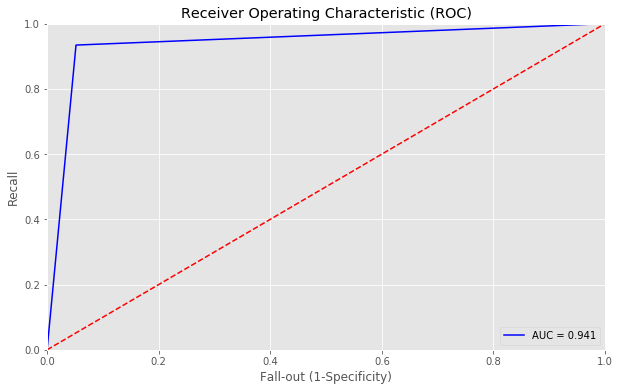

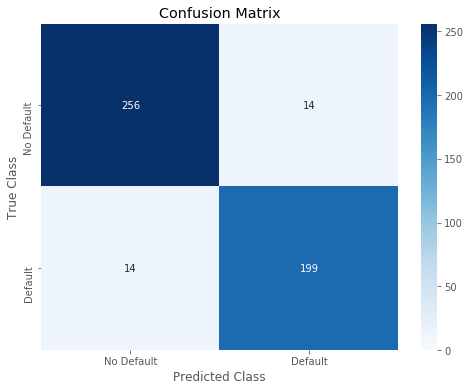

              precision    recall  f1-score   support

     class 0       0.95      0.95      0.95       270
     class 1       0.93      0.93      0.93       213

   micro avg       0.94      0.94      0.94       483
   macro avg       0.94      0.94      0.94       483
weighted avg       0.94      0.94      0.94       483



In [ ]:
predictions_lgbm_prob = XGB.predict(train_x.values)
predictions_lgbm_01 = np.where(predictions_lgbm_prob > 0.5, 1, 0) 
acc_lgbm = accuracy_score(train_y,predictions_lgbm_01)
print('Overall accuracy of Light GBM model:', acc_lgbm)
print_roc_curve(train_y, predictions_lgbm_prob)
r = print_confusion_matrix(train_y, predictions_lgbm_01)


Overall accuracy of Light GBM model: 0.9979296066252588


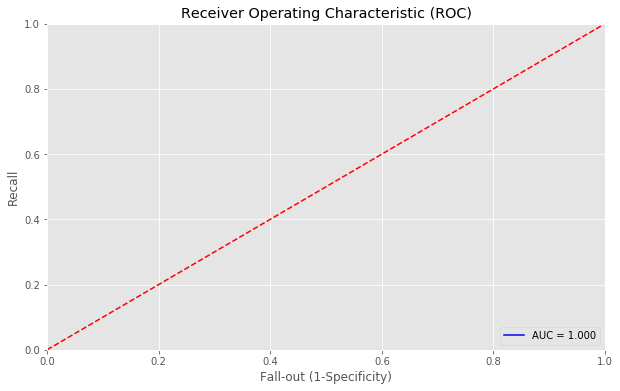

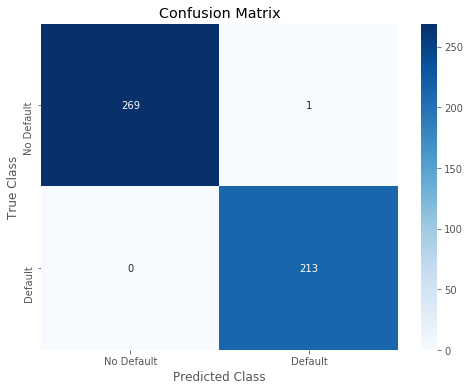

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00       270
     class 1       1.00      1.00      1.00       213

   micro avg       1.00      1.00      1.00       483
   macro avg       1.00      1.00      1.00       483
weighted avg       1.00      1.00      1.00       483



In [ ]:
predictions_lgbm_prob = lgbm.predict(train_x.values)
predictions_lgbm_01 = np.where(predictions_lgbm_prob > 0.5, 1, 0) 
acc_lgbm = accuracy_score(train_y,predictions_lgbm_01)
print('Overall accuracy of Light GBM model:', acc_lgbm)
print_roc_curve(train_y, predictions_lgbm_prob)
r = print_confusion_matrix(train_y, predictions_lgbm_01)
